In [4]:
cd "C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\data"

C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\data


In [5]:
pwd

'C:\\Users\\himab\\OneDrive\\Documents\\Github projects\\Medical Appointment No-Shows\\data'

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    r'C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\data\KaggleV2-May-2016.csv'
)


In [12]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


# Rename columns

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')
df.rename(columns={
    'hipertension': 'hypertension',
    'handcap': 'handicap',
    'no_show': 'no_show'
}, inplace=True)

# Convert Date Columns

In [17]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


# New Feature: Waiting Days

In [20]:
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

# “No-show” Column (0 or 1)

In [24]:
df['no_show'] = df['no_show'].map({'No':0,'Yes':1})

In [25]:
df['no_show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: no_show, Length: 110527, dtype: int64

# Remove Negative Ages

In [28]:
df = df[df['age'] >= 0]

# Duplicates Check

In [34]:
df = df.copy()
print("Total duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Total duplicate rows: 0


# Clean the patientid Column

In [37]:
# Fix patientid formatting (remove scientific notation)
df['patientid'] = df['patientid'].astype('int64')

In [38]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


In [39]:
# Save the final cleaned dataset to CSV file
df.to_csv(r'C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\data\cleaned_dataset.csv', index=False)


In [40]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


# Null Values

In [41]:
df.isnull().sum()


patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
waiting_days      0
dtype: int64

# Value Counts for Key Columns

In [45]:
print(df['no_show'].value_counts())
print(df['gender'].value_counts())
print(df['waiting_days'].describe())


no_show
0    88207
1    22319
Name: count, dtype: int64
gender
F    71839
M    38687
Name: count, dtype: int64
count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting_days, dtype: float64


# Unique Values

In [46]:
df.nunique()

patientid          62298
appointmentid     110526
gender                 2
scheduledday      103548
appointmentday        27
age                  103
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
waiting_days         131
dtype: int64

#  Count of No-Shows vs Shows

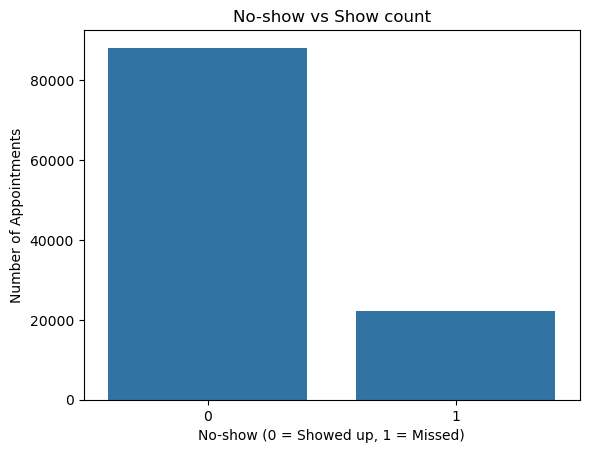

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot total no-shows vs shows
sns.countplot(x='no_show', data=df)
plt.title('No-show vs Show count')
plt.xlabel('No-show (0 = Showed up, 1 = Missed)')
plt.ylabel('Number of Appointments')
plt.show()

# No-Show Rate by Gender

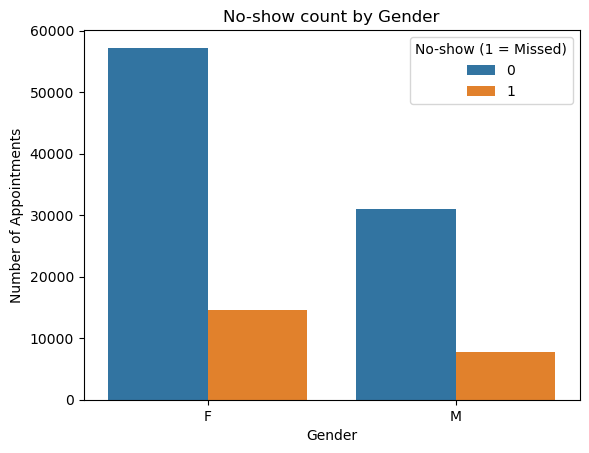

In [50]:
# Show and no-show counts for each gender
sns.countplot(x='gender', hue='no_show', data=df)
plt.title('No-show count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show (1 = Missed)')
plt.show()


# Age Distribution

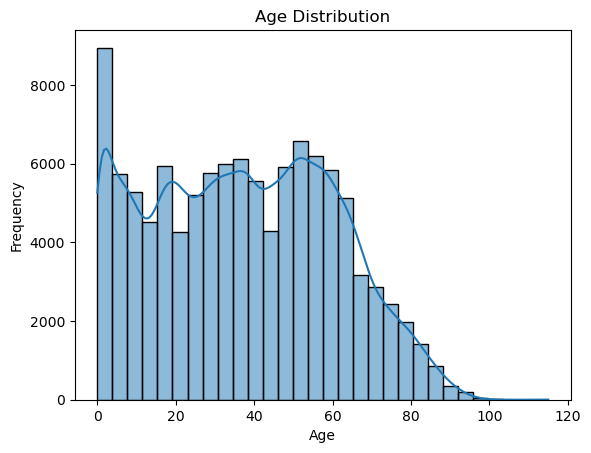

In [52]:
# Age distribution across all patients
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# No-show by Age Group

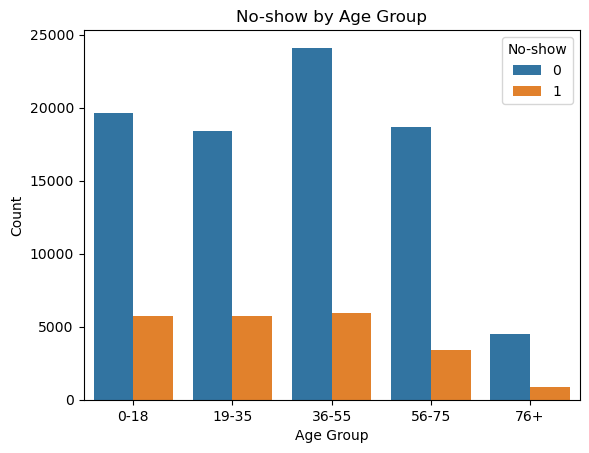

In [55]:
# Create age group column
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 75, 100], labels=['0-18', '19-35', '36-55', '56-75', '76+'])

# Plot no-show by age group
sns.countplot(x='age_group', hue='no_show', data=df)
plt.title('No-show by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()


#  Waiting Days vs No-Show

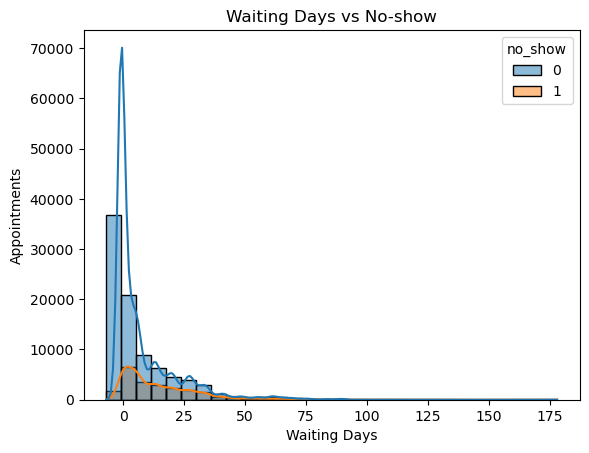

In [57]:
# Histogram of waiting days, split by no-show
sns.histplot(data=df, x='waiting_days', hue='no_show', bins=30, kde=True)
plt.title('Waiting Days vs No-show')
plt.xlabel('Waiting Days')
plt.ylabel('Appointments')
plt.show()


# No-show Rate by SMS Received

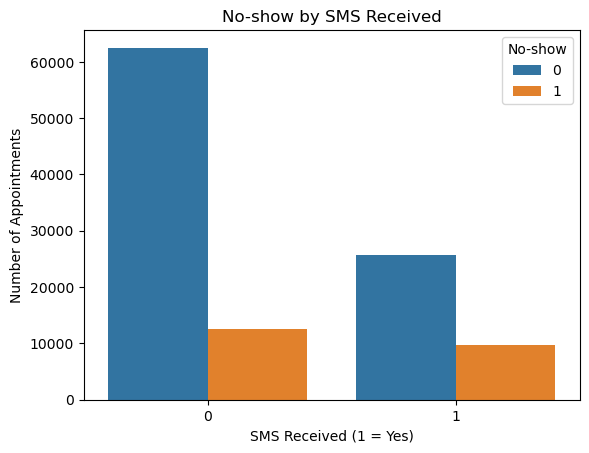

In [59]:
# Does receiving an SMS reduce no-shows?
sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title('No-show by SMS Received')
plt.xlabel('SMS Received (1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.show()


In [60]:
# Correlation Heatmap

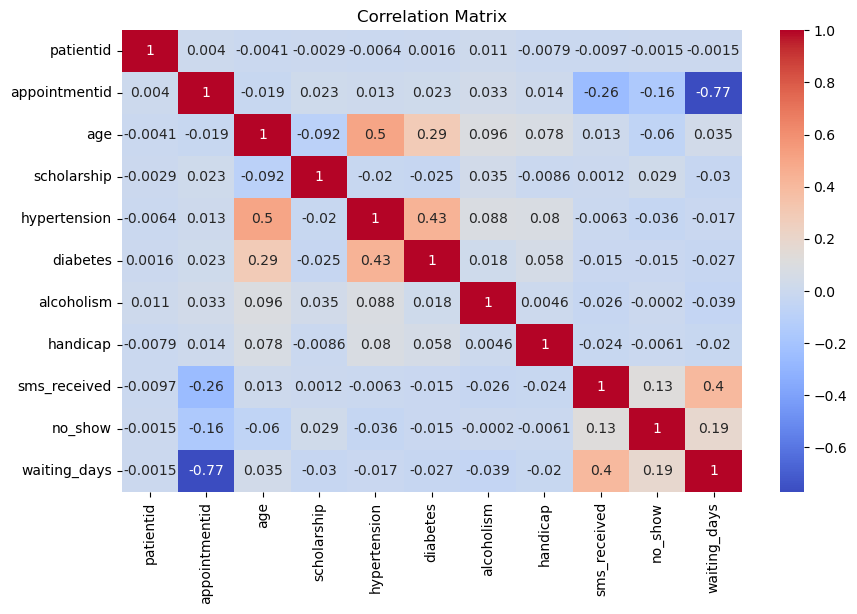

<Figure size 640x480 with 0 Axes>

In [65]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig("plot_name.png")

In [62]:
plt.savefig("plot_name.png")


<Figure size 640x480 with 0 Axes>

In [63]:
cd "C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\Insights"


C:\Users\himab\OneDrive\Documents\Github projects\Medical Appointment No-Shows\Insights


In [64]:
plt.savefig("plot_name.png")

<Figure size 640x480 with 0 Axes>

## 📊 Key Insights from EDA

# Over 80% of patients showed up for appointments.
# Females had more appointments but also slightly higher no-show volume.
# Age group 36–55 had the most no-shows.
# Patients with longer waiting days were more likely to miss.
# Those who received SMS reminders missed less frequently.
# Correlation matrix shows very weak linear relationships, so further modeling might require nonlinear techniques.
